# Data Preprocessing

In [119]:
import pandas as pd
import numpy as np
import re
import jieba

# visualisation
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes = True)

# k-means clustering
from sklearn.cluster import KMeans

In [120]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

## Load Data

In [83]:
# import train_data form mysql
df = pd.read_csv('train_data.csv', index_col = None)
df.head()

,blogger_name,blogger_id,blogger_gender,blogger_region,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_uid,brand_blog_name,...,no_likes,no_comments,no_reposts,no_topics,no_related_accounts,product,prod_url,product_price,product_popularity,produc_score
0,小米苏酥,87768787,female,海外,NaN,594,510000,10000,5619422243,井田志Gridnote,...,74,54,2,"今日彩妆,眼影,腮红",NaN,CANMAKE14腮红,https://detail.tmall.com/item.htm?id=527978438...,98,275712,4.9
1,小米苏酥,87768787,female,海外,NaN,594,510000,10000,6079473403,SUQQU_official,...,58,89,3,今日彩妆,NaN,SUQQU眉粉,https://detail.tmall.com/item.htm?id=600779196...,599,2581,4.9
2,小米苏酥,87768787,female,海外,NaN,594,510000,10000,6320994446,THREE,...,57,63,0,"今日彩妆,眼影,腮红,visee,three",NaN,THREE01腮红,https://detail.tmall.com/item.htm?id=572279100...,379,4397,4.7
3,小米苏酥,87768787,female,海外,NaN,594,510000,10000,2040921197,宝拉珍选PaulasChoice,...,127,131,41,"护肤,空瓶记",NaN,宝拉珍选大地之源洁面,https://detail.tmall.com/item.htm?id=443826948...,328,151674,4.7
4,小米苏酥,87768787,female,海外,NaN,594,510000,10000,1791154147,红门雅顿,...,54,67,31,"护肤,空瓶记",NaN,雅顿铂粹御肤精华,https://detail.tmall.com/item.htm?id=591580395...,790,194904,4.8


In [84]:
df.columns

Index(['blogger_name', 'blogger_id', 'blogger_gender', 'blogger_region',
       'blogger_tag', 'blogger_follows', 'blogger_fans', 'blogger_posts',
       'brand_uid', 'brand_blog_name', 'brand_gender', 'brand_region',
       'brand_tag', 'brand_follows', 'brand_fans', 'brand_posts', 'brand_name',
       'brand_hot_topic', 'post_id', 'post', 'picture', 'video', 'date',
       'no_likes', 'no_comments', 'no_reposts', 'no_topics',
       'no_related_accounts', 'product', 'prod_url', 'product_price',
       'product_popularity', 'produc_score'],
      dtype='object')

In [85]:
df.dtypes

blogger_name            object
blogger_id               int64
blogger_gender          object
blogger_region          object
blogger_tag             object
blogger_follows          int64
blogger_fans             int64
blogger_posts            int64
brand_uid                int64
brand_blog_name         object
brand_gender            object
brand_region            object
brand_tag               object
brand_follows            int64
brand_fans               int64
brand_posts              int64
brand_name              object
brand_hot_topic          int64
post_id                 object
post                    object
picture                 object
video                   object
date                    object
no_likes                 int64
no_comments              int64
no_reposts               int64
no_topics               object
no_related_accounts     object
product                 object
prod_url                object
product_price            int64
product_popularity       int64
produc_s

## Drop Strings

In [86]:
df = df.drop(['blogger_name','blogger_id','blogger_region','brand_uid','brand_blog_name',
              'brand_region','brand_tag','brand_name','post_id','date','product','prod_url'], axis = 1)
df.head()
df.columns

,blogger_gender,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_gender,brand_follows,brand_fans,brand_posts,brand_hot_topic,...,picture,video,no_likes,no_comments,no_reposts,no_topics,no_related_accounts,product_price,product_popularity,produc_score
0,female,NaN,594,510000,10000,male,363,3487,494,1,...,https://wx4.sinaimg.cn/large/053b3ed3gy1g9v069...,NaN,74,54,2,"今日彩妆,眼影,腮红",NaN,98,275712,4.9
1,female,NaN,594,510000,10000,female,217,490000,781,1,...,https://wx4.sinaimg.cn/large/053b3ed3gy1g9mx2f...,NaN,58,89,3,今日彩妆,NaN,599,2581,4.9
2,female,NaN,594,510000,10000,female,14,80000,624,0,...,https://wx1.sinaimg.cn/large/053b3ed3ly1g96rtx...,NaN,57,63,0,"今日彩妆,眼影,腮红,visee,three",NaN,379,4397,4.7
3,female,NaN,594,510000,10000,female,271,260000,7286,0,...,https://wx1.sinaimg.cn/large/053b3ed3ly1g95yvh...,NaN,127,131,41,"护肤,空瓶记",NaN,328,151674,4.7
4,female,NaN,594,510000,10000,female,268,250000,10000,0,...,https://wx1.sinaimg.cn/large/053b3ed3gy1g51ymr...,NaN,54,67,31,"护肤,空瓶记",NaN,790,194904,4.8


Index(['blogger_gender', 'blogger_tag', 'blogger_follows', 'blogger_fans',
       'blogger_posts', 'brand_gender', 'brand_follows', 'brand_fans',
       'brand_posts', 'brand_hot_topic', 'post', 'picture', 'video',
       'no_likes', 'no_comments', 'no_reposts', 'no_topics',
       'no_related_accounts', 'product_price', 'product_popularity',
       'produc_score'],
      dtype='object')

In [87]:
print(df.isnull().sum())

blogger_gender             0
blogger_tag             1411
blogger_follows            0
blogger_fans               0
blogger_posts              0
brand_gender               0
brand_follows              0
brand_fans                 0
brand_posts                0
brand_hot_topic            0
post                       0
picture                 2064
video                  14950
no_likes                   0
no_comments                0
no_reposts                 0
no_topics               7933
no_related_accounts    13036
product_price              0
product_popularity         0
produc_score               0
dtype: int64


## Convert Unstructured Data Into Structured Data

### Dummy for Blogger Gender

In [88]:
# convert gender into dummy
blg_gender = []

for i in df['blogger_gender'].tolist():
    if i == 'female':
        blg_gender.append(1)
    else:
        blg_gender.append(0)
        
df['blogger_gender'] = blg_gender

### Dummy for Brand Gender

In [89]:
brd_gender = []

for i in df['brand_gender'].tolist():
    if i == 'female':
        brd_gender.append(1)
    else:
        brd_gender.append(0)
        
df['brand_gender'] = brd_gender

### Blogger Tag Counts

In [90]:
tag_num = []

for i in df['blogger_tag'].tolist():
    if pd.isnull(i):
        tag_num.append(0)
        continue
    lst = i.split(',')
    tag_num.append(len(lst))
    
df['blogger_tag'] = tag_num

### Post Length

In [91]:
# load user dictionary
jieba.load_userdict('userdict_brand.txt')
jieba.load_userdict('userdict_endword.txt')

length = []

for p in df['post']:
    p = re.sub(r'[^a-zA-Z0-9\u4e00-\u9fff]' , '', p)
    tokens = jieba.lcut(p, cut_all = False, HMM = True)
    length.append(len(tokens))
    
df['post'] = length

### Dummy for Pictures

In [92]:
pic_num = []

for i in df['picture'].tolist():
    if pd.isnull(i):
        pic_num.append(0)
    else:
        lst = i.split(',')
        pic_num.append(len(lst))
        
df['picture'] = pic_num

### Dummy for Video

In [93]:
vid_num = []

for i in df['video'].tolist():
    if pd.isnull(i):
        vid_num.append(0)
    else:
        vid_num.append(1)
        
df['video'] = vid_num

### Topic Counts

In [94]:
top_num = []

for i in df['no_topics'].tolist():
    if pd.isnull(i):
        top_num.append(0)
    else:
        lst = i.split(',')
        top_num.append(len(lst))
        
df['no_topics'] = top_num

### Mentioned Account Counts

In [95]:
ral_num = []

for i in df['no_related_accounts'].tolist():
    if pd.isnull(i):
        ral_num.append(0)
    else:
        lst = i.split(',')
        ral_num.append(len(lst))
        
df['no_related_accounts'] = ral_num

In [96]:
df.dtypes

blogger_gender           int64
blogger_tag              int64
blogger_follows          int64
blogger_fans             int64
blogger_posts            int64
brand_gender             int64
brand_follows            int64
brand_fans               int64
brand_posts              int64
brand_hot_topic          int64
post                     int64
picture                  int64
video                    int64
no_likes                 int64
no_comments              int64
no_reposts               int64
no_topics                int64
no_related_accounts      int64
product_price            int64
product_popularity       int64
produc_score           float64
dtype: object

In [97]:
df.to_csv('processed-train.csv')

# EDA

## Correlation Heatmap

<Figure size 1440x720 with 0 Axes>

,blogger_gender,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_gender,brand_follows,brand_fans,brand_posts,brand_hot_topic,...,picture,video,no_likes,no_comments,no_reposts,no_topics,no_related_accounts,product_price,product_popularity,produc_score
blogger_gender,1.000000,-0.040283,-0.076263,-0.040674,-0.086393,-0.014427,0.006596,-0.016521,-0.026076,0.004832,...,0.113983,-0.085569,-0.019347,-0.031211,-0.027378,0.005997,-0.002874,-0.051165,0.025839,-0.014542
blogger_tag,-0.040283,1.000000,0.116460,0.237960,-0.024831,0.076266,-0.003553,0.058689,0.088563,0.014154,...,0.019707,0.076248,0.125406,0.112158,0.122955,0.183066,0.069967,0.111127,-0.027480,0.006539
blogger_follows,-0.076263,0.116460,1.000000,-0.062502,0.161774,-0.031151,0.020957,-0.016503,-0.011614,-0.035993,...,0.062487,-0.037807,0.000289,0.011331,0.043253,-0.007946,0.012222,0.030119,-0.028740,0.003517
blogger_fans,-0.040674,0.237960,-0.062502,1.000000,0.114312,0.097471,-0.020067,0.070332,0.110272,0.006587,...,0.071180,-0.004522,0.288512,0.246327,0.198142,0.085617,0.032280,0.076164,-0.017351,0.010537
blogger_posts,-0.086393,-0.024831,0.161774,0.114312,1.000000,-0.009049,0.007343,-0.029079,-0.041181,-0.023178,...,-0.046743,-0.034743,-0.045589,-0.040534,-0.027091,-0.048516,-0.037106,-0.014000,-0.033567,-0.008282
brand_gender,-0.014427,0.076266,-0.031151,0.097471,-0.009049,1.000000,0.072197,0.294183,0.361390,0.041303,...,0.012233,-0.011317,0.039095,0.030455,0.032855,0.052353,0.004540,0.126781,-0.066230,-0.040976
brand_follows,0.006596,-0.003553,0.020957,-0.020067,0.007343,0.072197,1.000000,-0.029100,0.166030,-0.012422,...,-0.005488,-0.010811,-0.017053,-0.008573,-0.015150,-0.014911,0.009399,-0.110333,-0.036505,-0.039161
brand_fans,-0.016521,0.058689,-0.016503,0.070332,-0.029079,0.294183,-0.029100,1.000000,0.458763,0.482306,...,0.083661,0.013286,0.048728,0.040494,0.067430,0.120498,0.034443,0.128412,0.025382,0.031522
brand_posts,-0.026076,0.088563,-0.011614,0.110272,-0.041181,0.361390,0.166030,0.458763,1.000000,0.256323,...,0.065419,-0.007256,0.073599,0.071499,0.045714,0.081901,0.013347,0.123767,0.075407,0.003781
brand_hot_topic,0.004832,0.014154,-0.035993,0.006587,-0.023178,0.041303,-0.012422,0.482306,0.256323,1.000000,...,0.035489,0.015987,0.013263,0.014772,0.021484,0.066036,0.026633,0.114180,0.085872,0.025113


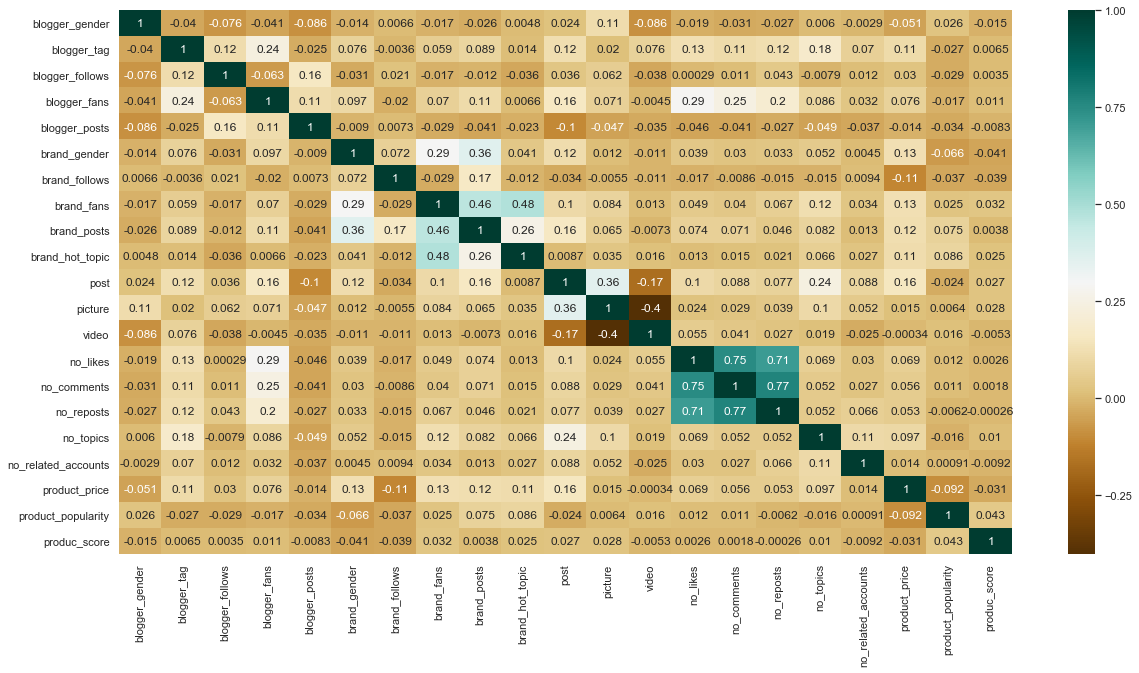

In [98]:
plt.figure(figsize = (20,10))
c = df.corr()
sns.heatmap(c,cmap = "BrBG", annot = True)
c

## Box-Plot

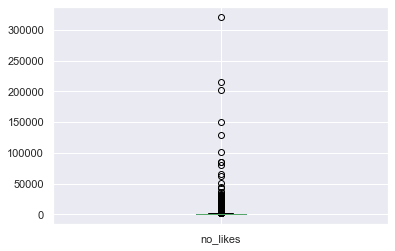

In [99]:
df.boxplot(column = ['no_likes'])

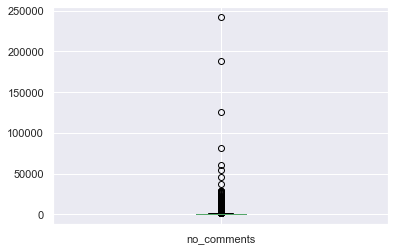

In [100]:
df.boxplot(column = ['no_comments'])

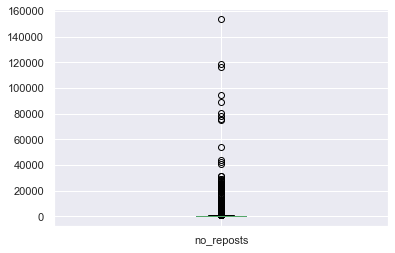

In [101]:
df.boxplot(column = ['no_reposts'])

## Outlier Diagnostics

In [102]:
df0 = pd.read_csv('train_data.csv', index_col = None)

In [103]:
for i in range(len(df)):
    if df['no_likes'][i] > 100000:
        print(df0['blogger_name'].iloc[i],i,df['no_likes'][i],df0.iloc[i]['post'])

俊平大魔王 578 215584 叔的福利专车又来了！！座位大翻倍！！100个中奖名额！6波福利连环送！都不过滤！快乐都是你们的 我只要 关注+转评赞！还有看一看双11优惠活动 让我看看谁能拿到我准备的：独享万元 贵妇粉底、限量彩妆重磅礼包！众享超万元的超豪华护肤彩妆合集！3000元阿玛尼黑钥匙面霜！2000元超实在购物基金！@微博抽奖平台
李佳琦Austin 5486 129384 OMG终极宠粉来啦~为了给你们赢奖品我真的太南了，YSL你是在整我和@李佳琦的小助理 吗？ 感谢这些时间深夜看直播的所有女生，熬夜依旧想要保持细腻透亮？这期视频一定要给我转评赞，超强福利150瓶价值超过10万元！全新精华#YSL夜皇后精华#抽150个MM各1瓶，熬佳琦的夜，你们都是最美的夜皇后！  李佳琦Austin的微博视频 抽奖详情
李佳琦Austin 5490 149595 #李佳琦推荐双十一爆款#所有女生，双十一爆款粉底液来咯~佳琦最爱用的娇兰金钻粉底液#一拍肌合#，买它！【双11预售】娇兰金钻修颜粉底液女干皮遮瑕保湿水润不易脱妆彩妆 转评赞，抽11个人平分11万~李佳琦Austin的秒拍视频 
李佳琦Austin 5491 201703 #李佳琦推荐双十一爆款#所有女生，双十一最值得买的欧舒丹护手霜来咯~这个冬天用它~【双11预售】欧舒丹护手霜礼盒樱花乳木果补水保湿女秋冬滋润套装 转评赞，抽11个人平分11万~李佳琦Austin的秒拍视频 
木头zmh 10399 100658 最近新入手的SKG面部精华导入仪，很赞很好用，使用效果很棒，完全解决了我之前皮肤问题。@SKG官方  这个美容仪有5个使用功能：清洁亮肤、滋润导入、温热保湿、EMS提拉紧致、红蓝光护肤。 而且还会有强弱两档模式。 不仅一款多用，还满足了我们日常护肤的多种需求，还不赶紧种草起来！！！ 这次也给粉丝宝宝谋了福利哦，同款美容仪，原价249，领券70元，到手价179元， 链接戳网页链接，还有转发我这条微博，抽一位宝宝送同款！！！木头zmh的秒拍视频
宝剑嫂 13179 321269 【🎉🎉宝剑嫂200w订阅福利🎉🎉】我来啦！这个视频很简单，就是给大家买买买！快点开看有啥！✅点赞＋关注：价值1400元ysl香水断货口红礼盒！2套！！✅转发＋关注：视频内礼物！价值10000元！一共揪19个！✅转发里！还揪1000

In [104]:
count = 0
del_lst = []

for i in range(len(df0)):
    if '抽' in df0.iloc[i]['post'] or '揪' in df0.iloc[i]['post'] or re.search('摸.位',df0.iloc[i]['post']) or re.search('摸.个',df0.iloc[i]['post'])or re.search('抱.个',df0.iloc[i]['post']):
        del_lst.append(i)
        
len(del_lst)

2352

In [105]:
# remove outliers from the pre-processed data
df0 = df0.drop(del_lst)
df0 = df0.reset_index(drop = True)
len(df0)
df0.head()

# remove outliers from the processed data
df = df.drop(del_lst)
df = df.reset_index(drop = True)
len(df)
df.head()

13556

,blogger_name,blogger_id,blogger_gender,blogger_region,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_uid,brand_blog_name,...,no_likes,no_comments,no_reposts,no_topics,no_related_accounts,product,prod_url,product_price,product_popularity,produc_score
0,小米苏酥,87768787,female,海外,NaN,594,510000,10000,5619422243,井田志Gridnote,...,74,54,2,"今日彩妆,眼影,腮红",NaN,CANMAKE14腮红,https://detail.tmall.com/item.htm?id=527978438...,98,275712,4.9
1,小米苏酥,87768787,female,海外,NaN,594,510000,10000,6079473403,SUQQU_official,...,58,89,3,今日彩妆,NaN,SUQQU眉粉,https://detail.tmall.com/item.htm?id=600779196...,599,2581,4.9
2,小米苏酥,87768787,female,海外,NaN,594,510000,10000,6320994446,THREE,...,57,63,0,"今日彩妆,眼影,腮红,visee,three",NaN,THREE01腮红,https://detail.tmall.com/item.htm?id=572279100...,379,4397,4.7
3,小米苏酥,87768787,female,海外,NaN,594,510000,10000,2040921197,宝拉珍选PaulasChoice,...,127,131,41,"护肤,空瓶记",NaN,宝拉珍选大地之源洁面,https://detail.tmall.com/item.htm?id=443826948...,328,151674,4.7
4,小米苏酥,87768787,female,海外,NaN,594,510000,10000,1791154147,红门雅顿,...,54,67,31,"护肤,空瓶记",NaN,雅顿铂粹御肤精华,https://detail.tmall.com/item.htm?id=591580395...,790,194904,4.8


13556

,blogger_gender,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_gender,brand_follows,brand_fans,brand_posts,brand_hot_topic,...,picture,video,no_likes,no_comments,no_reposts,no_topics,no_related_accounts,product_price,product_popularity,produc_score
0,1,0,594,510000,10000,0,363,3487,494,1,...,6,0,74,54,2,3,0,98,275712,4.9
1,1,0,594,510000,10000,1,217,490000,781,1,...,4,0,58,89,3,1,0,599,2581,4.9
2,1,0,594,510000,10000,1,14,80000,624,0,...,4,0,57,63,0,5,0,379,4397,4.7
3,1,0,594,510000,10000,1,271,260000,7286,0,...,1,0,127,131,41,2,0,328,151674,4.7
4,1,0,594,510000,10000,1,268,250000,10000,0,...,1,0,54,67,31,2,0,790,194904,4.8


In [ ]:
df.to_csv('cleaned_train.csv')

## Re-Box-Plot

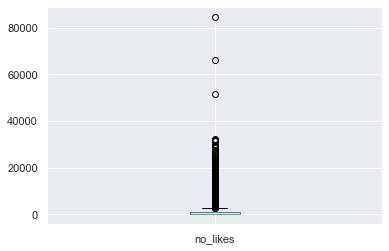

In [106]:
df.boxplot(column = ['no_likes'])

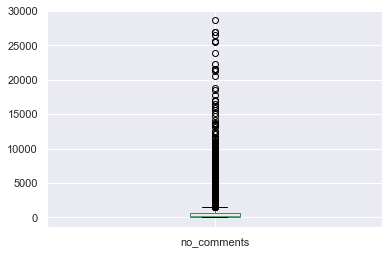

In [107]:
df.boxplot(column = ['no_comments'])

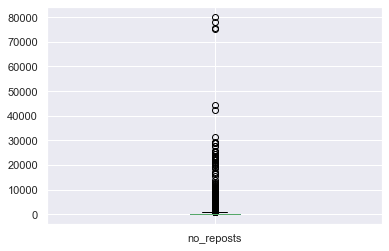

In [108]:
df.boxplot(column = ['no_reposts'])

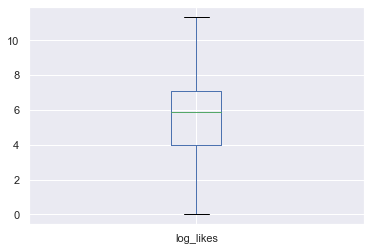

In [113]:
tmp = np.log(list(np.array(list(df['no_likes']))+1))
tmp = pd.DataFrame(tmp)
tmp.columns = ['log_likes']
tmp.boxplot(column = 'log_likes')

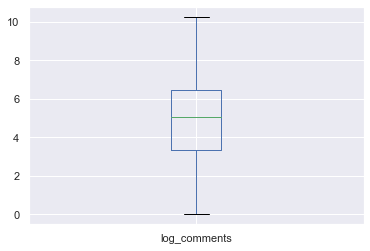

In [114]:
tmp = np.log(list(np.array(list(df['no_comments']))+1))
tmp = pd.DataFrame(tmp)
tmp.columns = ['log_comments']
tmp.boxplot(column = 'log_comments')

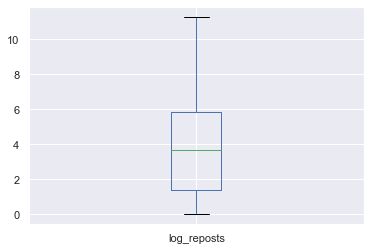

In [118]:
tmp = np.log(list(np.array(list(df['no_reposts']))+1))
tmp = pd.DataFrame(tmp)
tmp.columns = ['log_reposts']
tmp.boxplot(column = 'log_reposts')

# K-Means Clustering

In [132]:
df = pd.read_csv("cleaned_train.csv", index_col = 0)
df.head()
df.dtypes
df.columns

,blogger_gender,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_gender,brand_follows,brand_fans,brand_posts,brand_hot_topic,...,picture,video,no_likes,no_comments,no_reposts,no_topics,no_related_accounts,product_price,product_popularity,produc_score
0,1,0,594,510000,10000,0,363,3487,494,1,...,6,0,74,54,2,3,0,98,275712,4.9
1,1,0,594,510000,10000,1,217,490000,781,1,...,4,0,58,89,3,1,0,599,2581,4.9
2,1,0,594,510000,10000,1,14,80000,624,0,...,4,0,57,63,0,5,0,379,4397,4.7
3,1,0,594,510000,10000,1,271,260000,7286,0,...,1,0,127,131,41,2,0,328,151674,4.7
4,1,0,594,510000,10000,1,268,250000,10000,0,...,1,0,54,67,31,2,0,790,194904,4.8


blogger_gender           int64
blogger_tag              int64
blogger_follows          int64
blogger_fans             int64
blogger_posts            int64
brand_gender             int64
brand_follows            int64
brand_fans               int64
brand_posts              int64
brand_hot_topic          int64
post                     int64
picture                  int64
video                    int64
no_likes                 int64
no_comments              int64
no_reposts               int64
no_topics                int64
no_related_accounts      int64
product_price            int64
product_popularity       int64
produc_score           float64
dtype: object

Index(['blogger_gender', 'blogger_tag', 'blogger_follows', 'blogger_fans',
       'blogger_posts', 'brand_gender', 'brand_follows', 'brand_fans',
       'brand_posts', 'brand_hot_topic', 'post', 'picture', 'video',
       'no_likes', 'no_comments', 'no_reposts', 'no_topics',
       'no_related_accounts', 'product_price', 'product_popularity',
       'produc_score'],
      dtype='object')

NameError: name 'X' is not defined

## Log Likes

In [150]:
log_ol = np.log(df.iloc[:,13]+1)
X1 = pd.DataFrame(log_ol)
X1['y'] = np.ones(len(X1))
X1.reset_index(drop = True)
X1 = X1.as_matrix(columns = None)

,no_likes,y
0,4.317488,1.0
1,4.077537,1.0
2,4.060443,1.0
3,4.852030,1.0
4,4.007333,1.0
5,2.708050,1.0
6,3.332205,1.0
7,3.091042,1.0
8,3.610918,1.0
9,6.995766,1.0


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

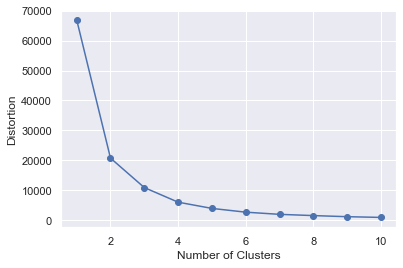

In [151]:
# calculate distortion for a range of number of cluster
distortions = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=13556,
        tol=1e-04, random_state=0
    )
    km.fit(X1)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [152]:
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=10, max_iter=13556, 
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(X1)

<Figure size 6000x4000 with 0 Axes>

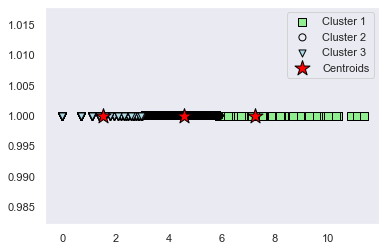

<Figure size 6000x4000 with 0 Axes>

In [153]:
# plot 3 clusters
plt.scatter(
    X1[y_km == 0, 0], X1[y_km == 0, 1], s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='Cluster 1'
)

plt.scatter(
    X1[y_km == 1, 0], X1[y_km == 1, 1], s=50, c='',
    marker='o', edgecolor='black',
    label='Cluster 2'
)

plt.scatter(
    X1[y_km == 2, 0], X1[y_km == 2, 1], s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='Cluster 3'
)


# plot centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='Centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.figure(dpi = 1000)

In [154]:
df_ll = df

In [155]:
df_ll['class'] = y_km

In [156]:
df_ll_final = df_ll.drop(['no_likes', 'no_comments', 'no_reposts'], axis = 1)

In [157]:
df_ll_final.to_csv('final_train_ll.csv')

## Log PCA

In [149]:
# no_likes, no_comments, no_reposts
origin = 0.6074*df.iloc[:,13] + 0.6173*df.iloc[:,14] + 0.5000*df.iloc[:,15]
origin

0          79.2818
1          91.6689
2          73.5117
3         178.5061
4          89.6587
5          18.3804
6          59.3762
7          31.8917
8          39.5335
9         813.9794
10       3233.4764
11       4487.8475
12       5444.8638
13       5516.1455
14       4800.7699
15       7011.4643
16       5854.8811
17       5292.9750
18       5055.8056
19       5471.0300
20       5564.4161
21       3834.5326
22       4377.7374
23       5985.6987
24       5018.0639
25       1517.5734
26       1727.4389
27        342.3387
28       1403.0220
29       2781.7040
           ...    
13526      43.2244
13527     668.5928
13528     124.8750
13529     181.7200
13530     154.6670
13531    1331.0938
13532    1183.9431
13533      52.9542
13534    2021.2120
13535     383.3053
13536       0.5000
13537       0.6074
13538       2.2247
13539       2.9296
13540       0.0000
13541       8.0249
13542       0.0000
13543       1.2247
13544       0.0000
13545       7.9061
13546       1.2148
13547       

In [159]:
log_pl = np.log(origin+1)
X2 = pd.DataFrame(log_pl)
X2['y'] = np.ones(len(X2))
X2.reset_index(drop = True)
X2 = X2.as_matrix(columns = None)

,0,y
0,4.385543,1.0
1,4.529033,1.0
2,4.310956,1.0
3,5.190209,1.0
4,4.507102,1.0
5,2.964262,1.0
6,4.100595,1.0
7,3.493220,1.0
8,3.702129,1.0
9,6.703163,1.0


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

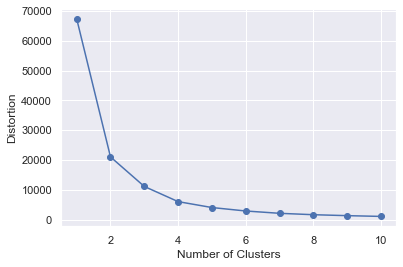

In [160]:
# calculate distortion for a range of number of cluster
distortions = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=13556,
        tol=1e-04, random_state=0
    )
    km.fit(X2)
    distortions.append(km.inertia_)

# plot 
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [161]:
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=10, max_iter=13556, 
    tol=1e-04, random_state=0
)

y_km_pl = km.fit_predict(X2)

<Figure size 6000x4000 with 0 Axes>

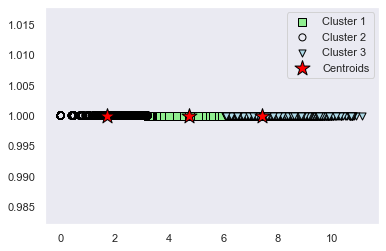

<Figure size 6000x4000 with 0 Axes>

In [162]:
# plot 3 clusters
plt.scatter(
    X2[y_km_pl == 0, 0], X2[y_km_pl == 0, 1], s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='Cluster 1'
)

plt.scatter(
    X2[y_km_pl == 1, 0], X2[y_km_pl == 1, 1], s=50, c='',
    marker='o', edgecolor='black',
    label='Cluster 2'
)

plt.scatter(
    X2[y_km_pl == 2, 0], X2[y_km_pl == 2, 1], s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='Cluster 3'
)

# plot centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='Centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.figure(dpi = 1000)

In [163]:
df_pl = df

In [164]:
df_pl['class']=y_km_pl

In [165]:
df_pl =df_pl.drop(['no_likes', 'no_comments', 'no_reposts'],axis=1)

In [166]:
df_pl.to_csv('final_train_pl.csv')

## Log Add

In [167]:
add = df.iloc[:,13]+df.iloc[:,14]+df.iloc[:,15]

In [168]:
log_al=np.log(add+1)
X3 = pd.DataFrame(log_al)
X3['y'] = np.ones(len(X3))
#X1 = pd.DataFrame(X).drop_duplicates()
X3.reset_index(drop = True)
X3 = X3.as_matrix(columns = None)

,0,y
0,4.875197,1.0
1,5.017280,1.0
2,4.795791,1.0
3,5.703782,1.0
4,5.030438,1.0
5,3.433987,1.0
6,4.584967,1.0
7,3.970292,1.0
8,4.189655,1.0
9,7.202661,1.0


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=13556,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

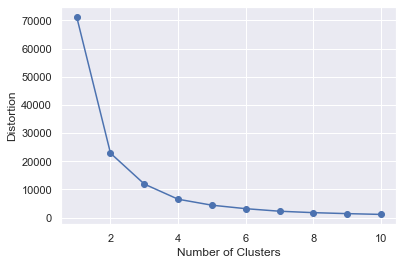

In [169]:
# calculate distortion for a range of number of cluster
distortions = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=13556,
        tol=1e-04, random_state=0
    )
    km.fit(X3)
    distortions.append(km.inertia_)

# plot 
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [170]:
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=10, max_iter=13556, 
    tol=1e-04, random_state=0
)
y_km_al = km.fit_predict(X3)

<Figure size 6000x4000 with 0 Axes>

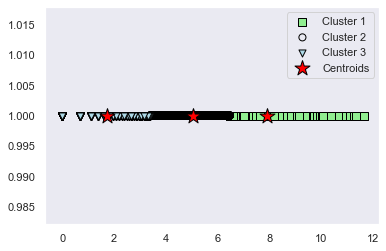

<Figure size 6000x4000 with 0 Axes>

In [171]:
# plot 3 clusters
plt.scatter(
    X3[y_km_al == 0, 0], X3[y_km_al == 0, 1], s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='Cluster 1'
)

plt.scatter(
    X3[y_km_al == 1, 0], X3[y_km_al == 1, 1], s=50, c='',
    marker='o', edgecolor='black',
    label='Cluster 2'
)

plt.scatter(
    X3[y_km_al == 2, 0], X3[y_km_al == 2, 1], s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='Cluster 3'
)

# plot centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='Centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.figure(dpi = 1000)

In [172]:
df_al = df

In [173]:
df_al['class'] = y_km_al

In [174]:
df_al = df_al.drop(['no_likes', 'no_comments', 'no_reposts'],axis=1)

In [175]:
df_al.to_csv('final_train_al.csv')